In [24]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
   
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
import pandas as pd

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

from tigramite.models import LinearMediation, Prediction

In [25]:
building1_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_1.csv")
building2_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_2.csv")
building3_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_3.csv")

print(building1_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [26]:
weather_data = pd.read_csv("citylearn_challenge_2023_phase_1/weather.csv")
print(weather_data)

     outdoor_dry_bulb_temperature  outdoor_relative_humidity  \
0                           24.66                      77.56   
1                           24.07                      85.12   
2                           23.90                      89.62   
3                           23.87                      91.88   
4                           23.83                      93.06   
..                            ...                        ...   
715                         31.98                      43.75   
716                         29.92                      51.62   
717                         28.48                      59.12   
718                         27.27                      66.56   
719                         26.26                      73.75   

     diffuse_solar_irradiance  direct_solar_irradiance  \
0                        0.00                     0.00   
1                        0.00                     0.00   
2                        0.00                     0.00   

In [27]:
building1_data['outdoor_dry_bulb_temperature'] = weather_data['outdoor_dry_bulb_temperature']
building1_data['outdoor_relative_humidity'] = weather_data['outdoor_relative_humidity']

building2_data['outdoor_dry_bulb_temperature'] = weather_data['outdoor_dry_bulb_temperature']
building2_data['outdoor_relative_humidity'] = weather_data['outdoor_relative_humidity']

building3_data['outdoor_dry_bulb_temperature'] = weather_data['outdoor_dry_bulb_temperature']
building3_data['outdoor_relative_humidity'] = weather_data['outdoor_relative_humidity']

print(building1_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [28]:
columns_of_interest = ['indoor_dry_bulb_temperature','indoor_relative_humidity','indoor_dry_bulb_temperature_set_point','outdoor_dry_bulb_temperature','outdoor_relative_humidity']
building1_data = building1_data[columns_of_interest]
building2_data = building2_data[columns_of_interest]
building3_data = building3_data[columns_of_interest]

print(building1_data)

     indoor_dry_bulb_temperature  indoor_relative_humidity  \
0                      23.098652                 61.086185   
1                      22.234743                 64.361380   
2                      22.223060                 64.493416   
3                      22.222250                 64.769700   
4                      22.222237                 65.152120   
..                           ...                       ...   
715                    24.468618                 54.277103   
716                    24.444859                 54.351337   
717                    24.444464                 54.532566   
718                    24.444452                 54.647182   
719                    21.812447                 63.234272   

     indoor_dry_bulb_temperature_set_point  outdoor_dry_bulb_temperature  \
0                                23.222221                         24.66   
1                                22.222221                         24.07   
2                          

I prossimi tre grafici mostrano singolarmente per ogni bulding il relativo time_series

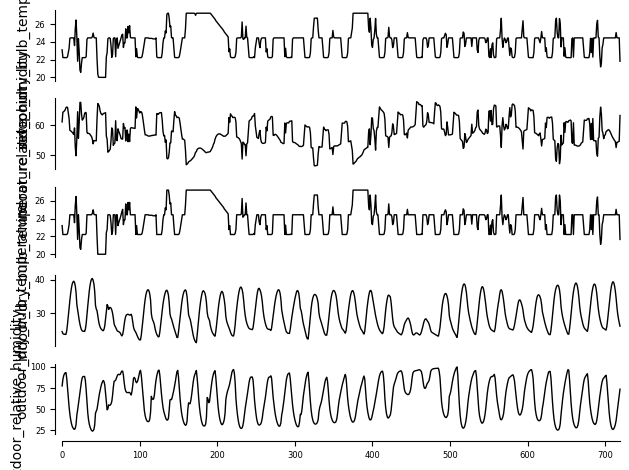

In [29]:
data_array = building1_data.values
var_names = columns_of_interest
dataframe = pp.DataFrame(data=data_array, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()

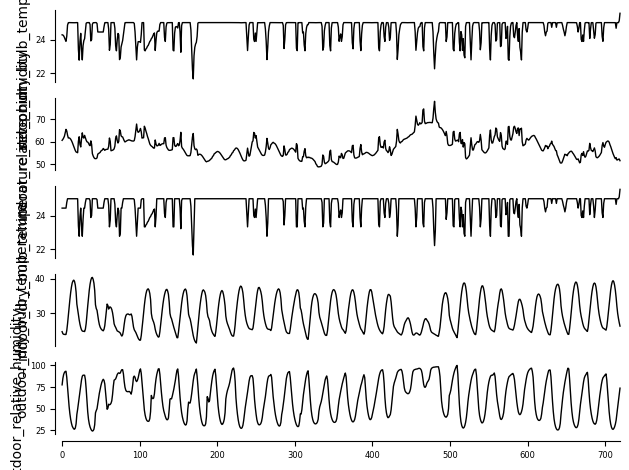

In [30]:
data_array = building2_data.values
var_names = columns_of_interest
dataframe = pp.DataFrame(data=data_array, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()

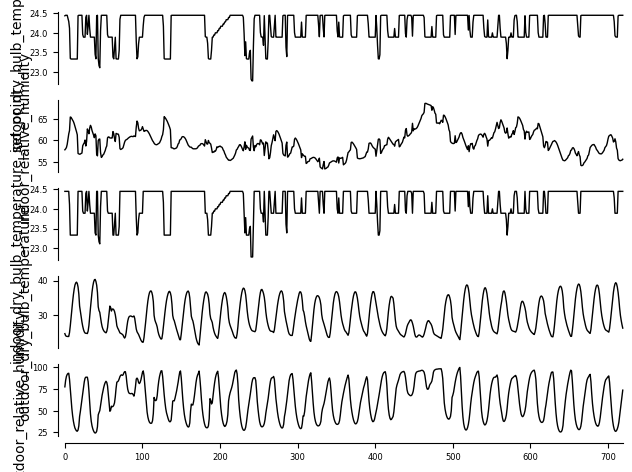

In [31]:
data_array = building3_data.values
var_names = columns_of_interest
dataframe = pp.DataFrame(data=data_array, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()

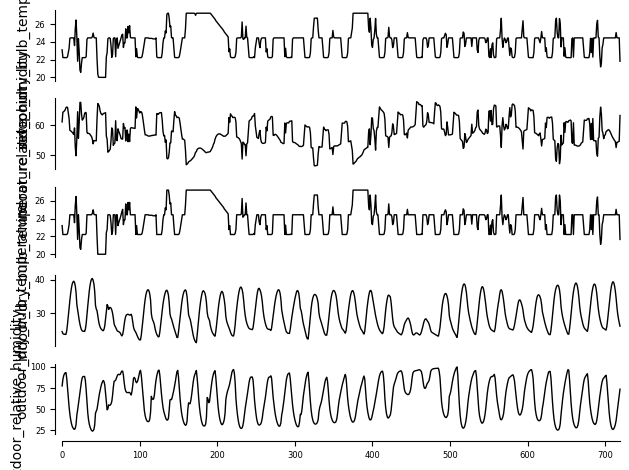

In [32]:
#qui ho provato avendo trovato la flag multiple (anche se non so se sia quella che intendavate) e ho unito i tre dataframe

dataset = np.array([building1_data.values, building2_data.values, building3_data.values])
var_names = columns_of_interest
dataframe = pp.DataFrame(data=dataset, var_names=var_names, analysis_mode='multiple')
tp.plot_timeseries(dataframe); plt.show()


In [33]:
#Specifica del test di indipendenza
parcorr = ParCorr()

#esecuzione PCMCI
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1,
)

#definisco i lag da considerare
results = pcmci_parcorr.run_pcmci(tau_max=5, pc_alpha=0.05, alpha_level = 0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable indoor_dry_bulb_temperature has 4 link(s):
        (indoor_dry_bulb_temperature_set_point -1): max_pval = 0.00067, |min_val| =  0.074
        (indoor_dry_bulb_temperature -1): max_pval = 0.00089, |min_val| =  0.072
        (indoor_dry_bulb_temperature_set_point -2): max_pval = 0.02992, |min_val| =  0.047
        (outdoor_dry_bulb_temperature -1): max_pval = 0.03358, |min_val| =  0.046

    Variable indoor_relative_humidity has 4 link(s):
        (indoor_relative_humidity -1): max_pval = 0.00000, |min_val| =  0.708
        (outdoor_relative_humidity -1): max_pval = 0.00002, |min_val| =  0.093
        (indoor_dry_bulb_temperature -1): max_pval = 0.00131, |min_val| =  0.070
        (outdoor_relative_humidity -2): max_pval = 0.03067, |min_val| =  

In [34]:
#Visualizzo i risultati
print("p-values:")
print(results['p_matrix'])
print("Valori causali:")
print(results['val_matrix'])

p-values:
[[[1.00000000e+000 3.14110450e-004 9.94175336e-002 1.46860373e-005
   2.25625601e-006 5.22680058e-001]
  [0.00000000e+000 4.68387659e-006 5.11524593e-010 3.75761394e-001
   4.88624038e-005 3.94102012e-001]
  [0.00000000e+000 4.43550324e-001 1.91595813e-012 3.51935755e-001
   2.24748105e-004 9.09306726e-001]
  [9.74548822e-001 5.89444825e-002 2.25414388e-001 7.89691039e-001
   4.28023958e-001 2.14396280e-001]
  [8.24914631e-001 4.71213501e-001 7.31406221e-001 1.17615938e-001
   6.88012260e-001 2.38072762e-001]]

 [[0.00000000e+000 8.01239754e-001 1.52768886e-001 5.64943331e-006
   4.49277557e-006 4.55110161e-001]
  [1.00000000e+000 4.60337437e-032 4.23553816e-008 7.59566104e-002
   9.90636065e-006 2.27807200e-001]
  [0.00000000e+000 7.94065107e-001 1.00085972e-011 2.42296602e-001
   5.21065210e-004 9.25365971e-001]
  [1.79325047e-001 6.09063986e-002 9.69994278e-002 4.81906765e-003
   4.11942834e-001 1.77430631e-001]
  [8.24464168e-002 7.28268093e-001 6.02338880e-001 3.99957656

In [35]:
#qui ho provato a trovare quei valori in p_matrix che rispettano la soglia di alpha_level e stampo i collegamenti
#(non so se era come pensavate lunedì oppure se ho totalmente sbagliato approccio)
#ho usato l'alpha level perché non ricordo se dovevo usare il pc_alpha

p_matrix = results['p_matrix']
val_matrix = results['val_matrix']

num_vars = len(dataframe.var_names)
for i in range(num_vars):
    for j in range(num_vars):
        for tau in range(p_matrix.shape[2]):
            if p_matrix[i, j, tau] < 0.01:
                print(f"Link significativo da {dataframe.var_names[i]} a {dataframe.var_names[j]} al lag {tau} "
                      f"con p-value {p_matrix[i, j, tau]:.4f} e MCI {val_matrix[i, j, tau]:.4f}")

Link significativo da indoor_dry_bulb_temperature a indoor_dry_bulb_temperature al lag 1 con p-value 0.0003 e MCI 0.0781
Link significativo da indoor_dry_bulb_temperature a indoor_dry_bulb_temperature al lag 3 con p-value 0.0000 e MCI 0.0939
Link significativo da indoor_dry_bulb_temperature a indoor_dry_bulb_temperature al lag 4 con p-value 0.0000 e MCI 0.1024
Link significativo da indoor_dry_bulb_temperature a indoor_relative_humidity al lag 0 con p-value 0.0000 e MCI -0.9834
Link significativo da indoor_dry_bulb_temperature a indoor_relative_humidity al lag 1 con p-value 0.0000 e MCI 0.0992
Link significativo da indoor_dry_bulb_temperature a indoor_relative_humidity al lag 2 con p-value 0.0000 e MCI 0.1344
Link significativo da indoor_dry_bulb_temperature a indoor_relative_humidity al lag 4 con p-value 0.0000 e MCI -0.0880
Link significativo da indoor_dry_bulb_temperature a indoor_dry_bulb_temperature_set_point al lag 0 con p-value 0.0000 e MCI 0.9910
Link significativo da indoor_dry

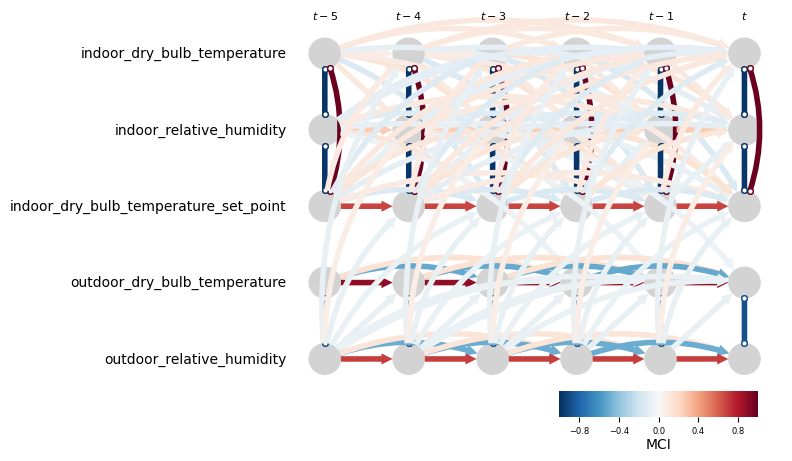

In [36]:
#anche se difficile per via degli innumerevoli archi, rispetto al grafico in prova2 dove usa 3 dataset, il grafico risulta differente

#mostro il plot del grafo delle time_series
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

Ho provato a fare anche qui la predizione ma come andrete a vedere, riporta l'errore Prediction class currently only supports single datasets.

In [37]:
#provando a sistemare l'esempio, il mio T corrisponde al numero di elementi nel mio dataframe
#dato che pp.Dataframe non ha il metodo shape e non so in che altri modi ottenere il numero di elementi
#ho preso dataset che corrisponde a dataset = np.array([building1_data.values, building2_data.values, building3_data.values])
#fatto durante la creazione del dataframe per il PCMCI e uso shape[1]

T = dataset.shape[1]

pred = Prediction(dataframe=dataframe,
        cond_ind_test=ParCorr(),   #CMIknn ParCorr
        prediction_model = sklearn.linear_model.LinearRegression(),
#         prediction_model = sklearn.gaussian_process.GaussianProcessRegressor(),
        # prediction_model = sklearn.neighbors.KNeighborsRegressor(),
    data_transform=sklearn.preprocessing.StandardScaler(),
    train_indices= range(int(0.75*T)),
    test_indices= range(int(0.25*T), T),
    verbosity=1
    )



ValueError: Prediction class currently only supports single datasets.

Qua di seguito c'è la parte relativa alla ANN. Ho praticamente copiato il codice dell'esempio che ho fatto vedere durante il primo ricevimento, cambiando ovviamente qualche cosa

In [15]:
#importazione delle librerie utili alla creazione della ANN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [16]:
#guardando i link significativi ho deciso di usare come target outdoor_dry_bulb_temperature mentre come features tutte le variabili che la influenzavano

target = 'outdoor_dry_bulb_temperature'
features = ['outdoor_relative_humidity', 'indoor_relative_humidity']


In [17]:
def create_model_large():
    # create model
    model = Sequential()
    #your code here	
    model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = [metrics.mae])
    
    return model

In [18]:
def RMSE(real, pred):
    return sqrt(mean_squared_error(real, pred))

def NRMSE(real, pred):
    return sqrt(mean_squared_error(real, pred)/(real.max() - real.min()))

In [19]:
# Descriptive statistics summary dataframe_1
dataframe_1 = building1_data.drop(columns=['indoor_dry_bulb_temperature',	'indoor_dry_bulb_temperature_set_point'])
dataframe_1.describe()

,indoor_relative_humidity,outdoor_dry_bulb_temperature,outdoor_relative_humidity
count,720.000000,720.000000,720.000000
mean,57.808783,29.588125,63.663111
std,4.707318,4.787630,22.398824
min,46.463528,21.380000,24.120000
25%,54.488178,25.327500,42.620000
50%,57.407695,28.480000,65.280000
75%,61.325861,34.092500,85.120000
max,67.854750,40.320000,100.000000


In [20]:
# Descriptive statistics summary dataframe_2
dataframe_2 = building2_data.drop(columns=['indoor_dry_bulb_temperature',	'indoor_dry_bulb_temperature_set_point'])
dataframe_2.describe()

,indoor_relative_humidity,outdoor_dry_bulb_temperature,outdoor_relative_humidity
count,720.000000,720.000000,720.000000
mean,57.896065,29.588125,63.663111
std,4.694232,4.787630,22.398824
min,48.831596,21.380000,24.120000
25%,54.278546,25.327500,42.620000
50%,57.127430,28.480000,65.280000
75%,60.704571,34.092500,85.120000
max,78.106060,40.320000,100.000000


In [21]:
# Descriptive statistics summary dataframe_3
dataframe_3 = building3_data.drop(columns=['indoor_dry_bulb_temperature',	'indoor_dry_bulb_temperature_set_point'])
dataframe_3.describe()

,indoor_relative_humidity,outdoor_dry_bulb_temperature,outdoor_relative_humidity
count,720.000000,720.000000,720.000000
mean,59.549204,29.588125,63.663111
std,2.889132,4.787630,22.398824
min,53.479610,21.380000,24.120000
25%,57.699385,25.327500,42.620000
50%,59.312935,28.480000,65.280000
75%,61.301242,34.092500,85.120000
max,68.515810,40.320000,100.000000


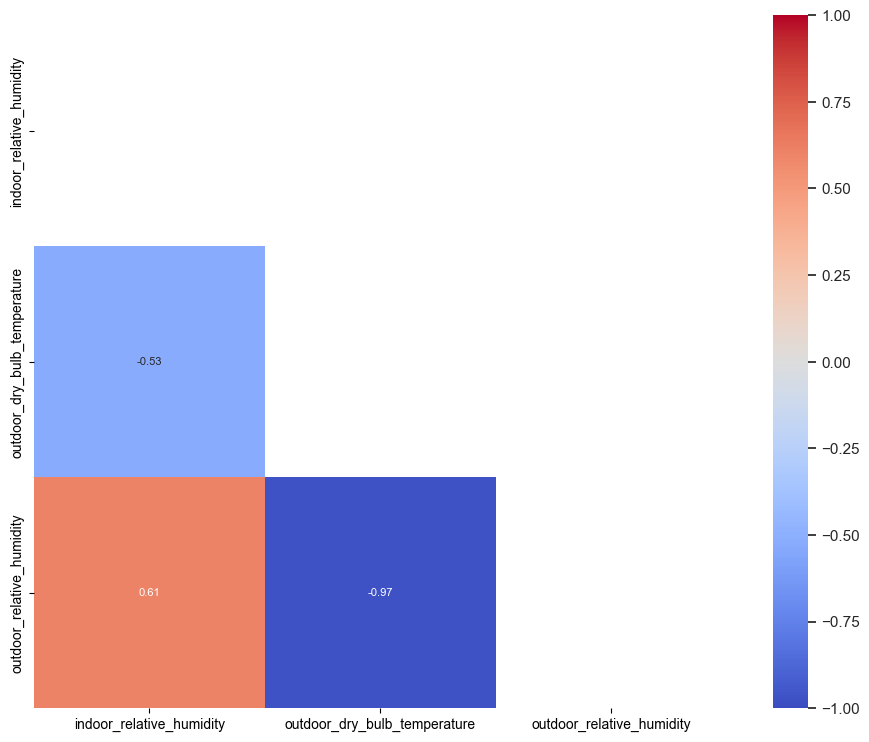

In [22]:
# Correlation matrix
corrmat = dataframe_1.corr()

# Generate a mask for the upper triangle
matrix = np.triu(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1)
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True, annot_kws={'size': 8}, mask=matrix, fmt='.2g', cmap= 'coolwarm')

plt.show()

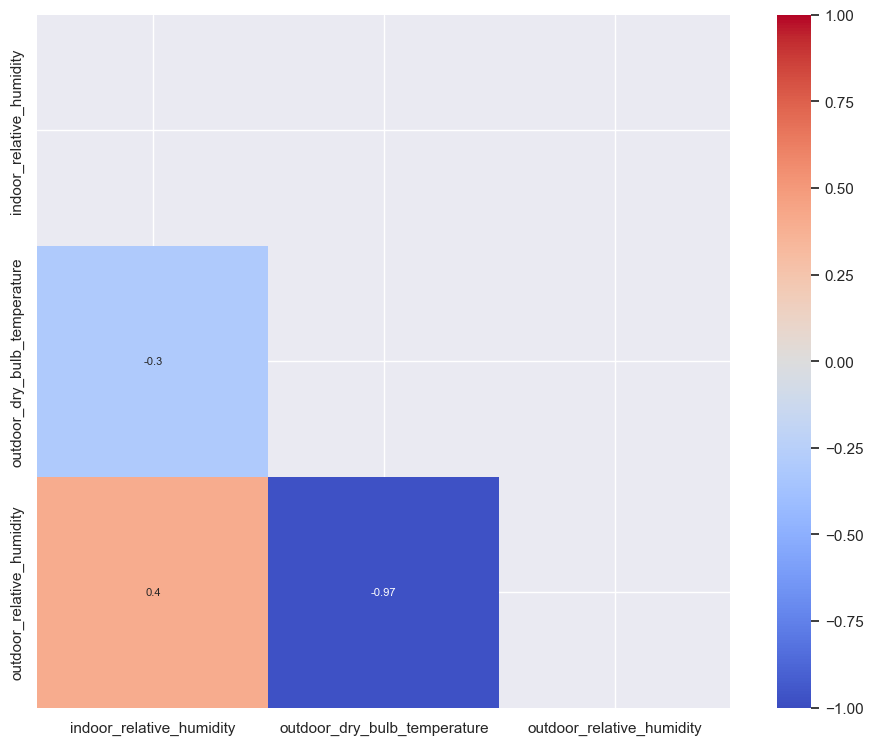

In [23]:
# Correlation matrix
corrmat = dataframe_2.corr()

# Generate a mask for the upper triangle
matrix = np.triu(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1)
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True, annot_kws={'size': 8}, mask=matrix, fmt='.2g', cmap= 'coolwarm')

plt.show()

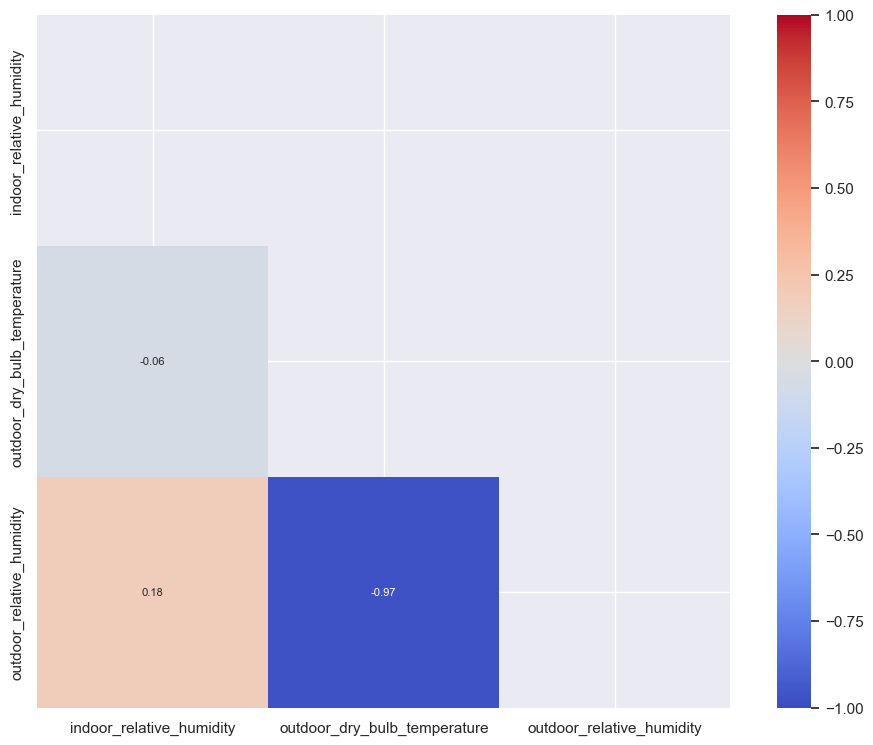

In [24]:
# Correlation matrix
corrmat = dataframe_3.corr()

# Generate a mask for the upper triangle
matrix = np.triu(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1)
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True, annot_kws={'size': 8}, mask=matrix, fmt='.2g', cmap= 'coolwarm')

plt.show()

In [25]:
# Standardizing data
sc= MinMaxScaler(feature_range=(-1,1))

for var in features:
    if(var != target):
        dataframe_1[var] = sc.fit_transform(dataframe_1[var].values.reshape(-1, 1))

for var in features:
    if(var != target):
        dataframe_2[var] = sc.fit_transform(dataframe_2[var].values.reshape(-1, 1))

for var in features:
    if(var != target):
        dataframe_3[var] = sc.fit_transform(dataframe_3[var].values.reshape(-1, 1))

In [26]:
#NumPy representation of the data frame (removing labels)

#qui ho provato in qualche modo ad unire tutti i valori delle features e tutti i valori del target tramite concatenate perchè ho provato
#ad ottenere un qualcosa di simile dalla flag 'multiple' usata nella parte del PCMCI. Però non sono sicuro perché penso sia simile al concetto di
#concatenazione fatto in prova2

X_1 = dataframe_1.drop(columns=target)
X_2 = dataframe_2.drop(columns=target)
X_3 = dataframe_3.drop(columns=target)

X = np.concatenate([X_1.to_numpy(), X_2.to_numpy(), X_3.to_numpy()])

Y_1 = dataframe_1[target]
Y_2 = dataframe_2[target]
Y_3 = dataframe_3[target]

Y = np.concatenate([Y_1.to_numpy(), Y_2.to_numpy(), Y_3.to_numpy()])

seed = 7
np.random.seed(seed)

# split dataset in 75% for traininig and 25% for testing (500 -> 375,125)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

# split training in 80% for traininig and 20% for validating (375 -> 300,75)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed)#insert your code here

# Model creation (choose between tiny, small, medium and large by using the appropriate function)
model = create_model_large()
model.summary()


c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,641 (6.41 KB)

 Trainable params: 1,641 (6.41 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 885.5108 - mean_absolute_error: 29.3583 - val_loss: 851.0156 - val_mean_absolute_error: 28.7794
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 794.4536 - mean_absolute_error: 27.7135 - val_loss: 608.4654 - val_mean_absolute_error: 24.0912
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 478.9776 - mean_absolute_error: 20.8101 - val_loss: 123.3224 - val_mean_absolute_error: 9.3113
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.2391 - mean_absolute_error: 6.8498 - val_loss: 26.7531 - val_mean_absolute_error: 4.4198
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2026 - mean_absolute_error: 3.8574 - val_loss: 11.8342 - val_mean_absolute_error: 2.8831
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3710 - mean_absolute_error: 2.7131 - val_loss: 8.5889 - val_mean_absolute_error: 2.4078
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0123 - mean_absolute_er

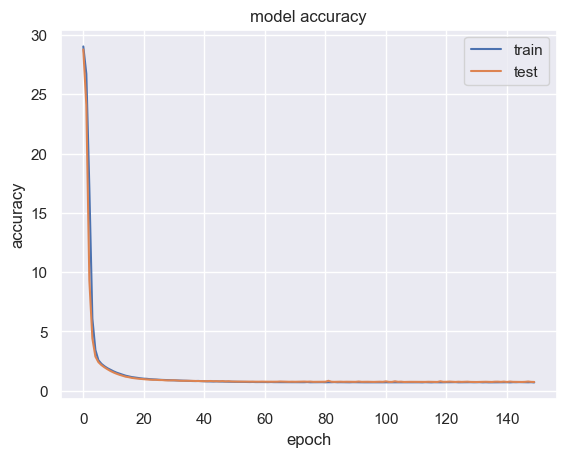

In [28]:
# Summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

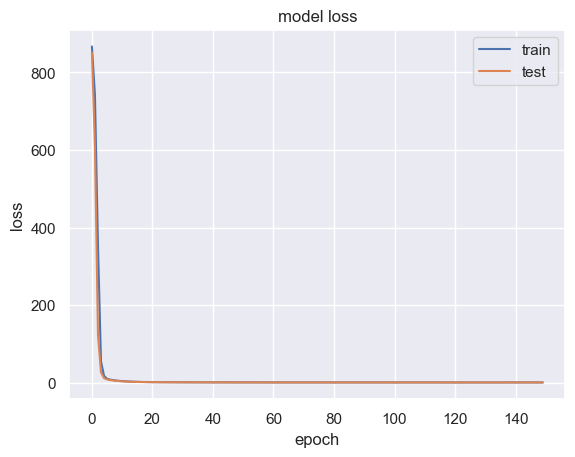

In [29]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [30]:
# Prediction
pred = model.predict(X_test).reshape(1,-1)[0]

rmse = RMSE(y_test, pred)
nrmse = NRMSE(y_test, pred)


print("rmse : ",rmse,"  nrmse : ",nrmse)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
rmse :  0.9215639264634874   nrmse :  0.2139126562205113


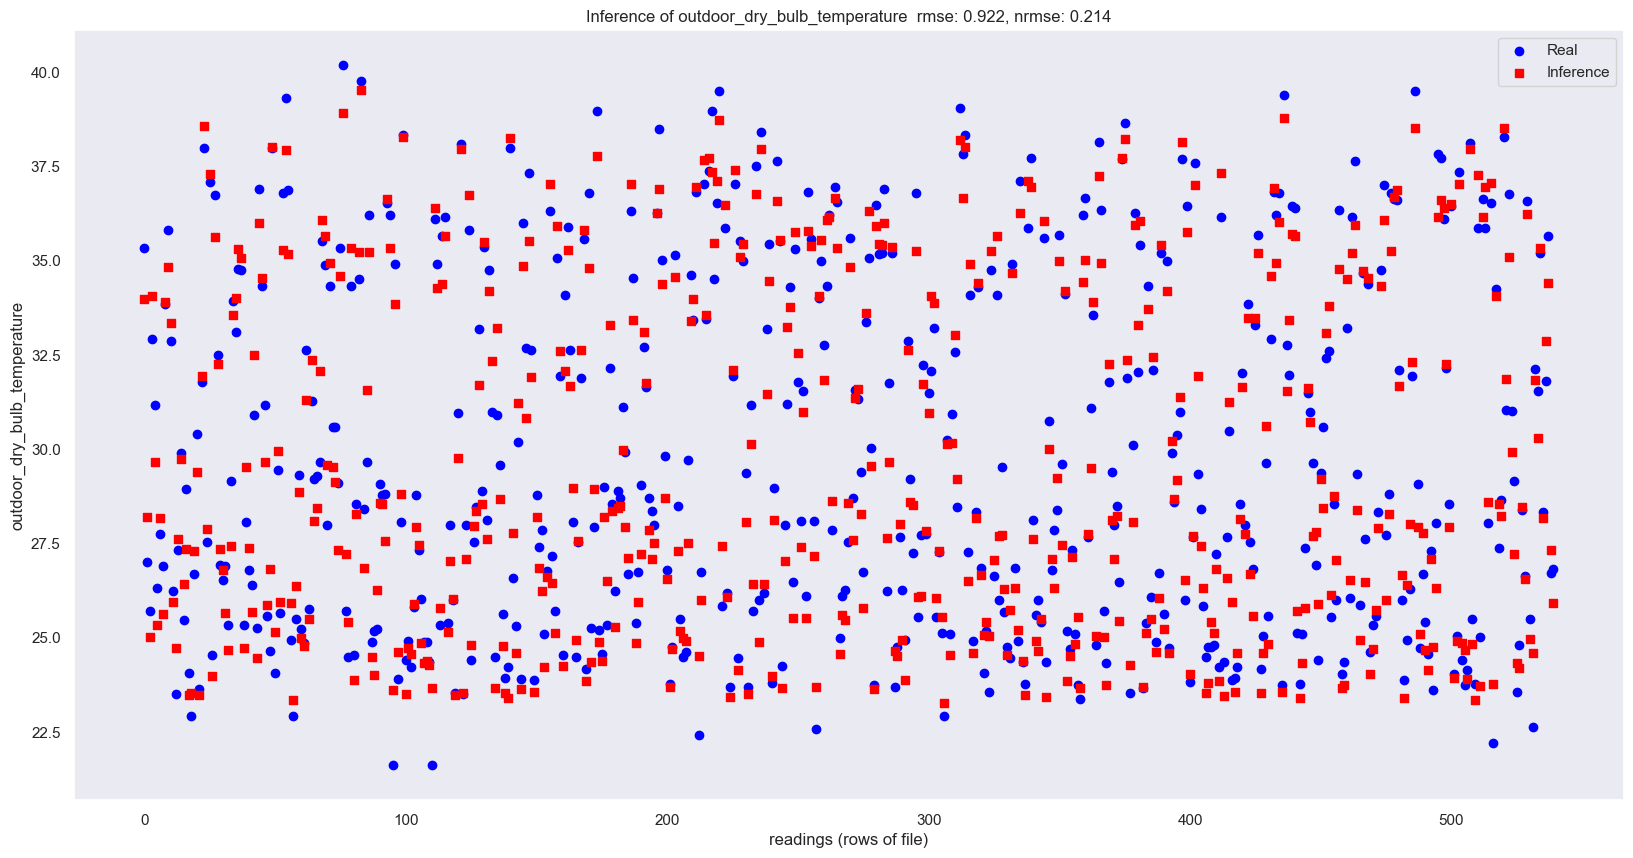

In [31]:
my_x=np.arange(0,len(X_test[:,0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of {target}  rmse: {rmse:.3f}, nrmse: {nrmse:.3f}')
plt.ylabel(target)
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

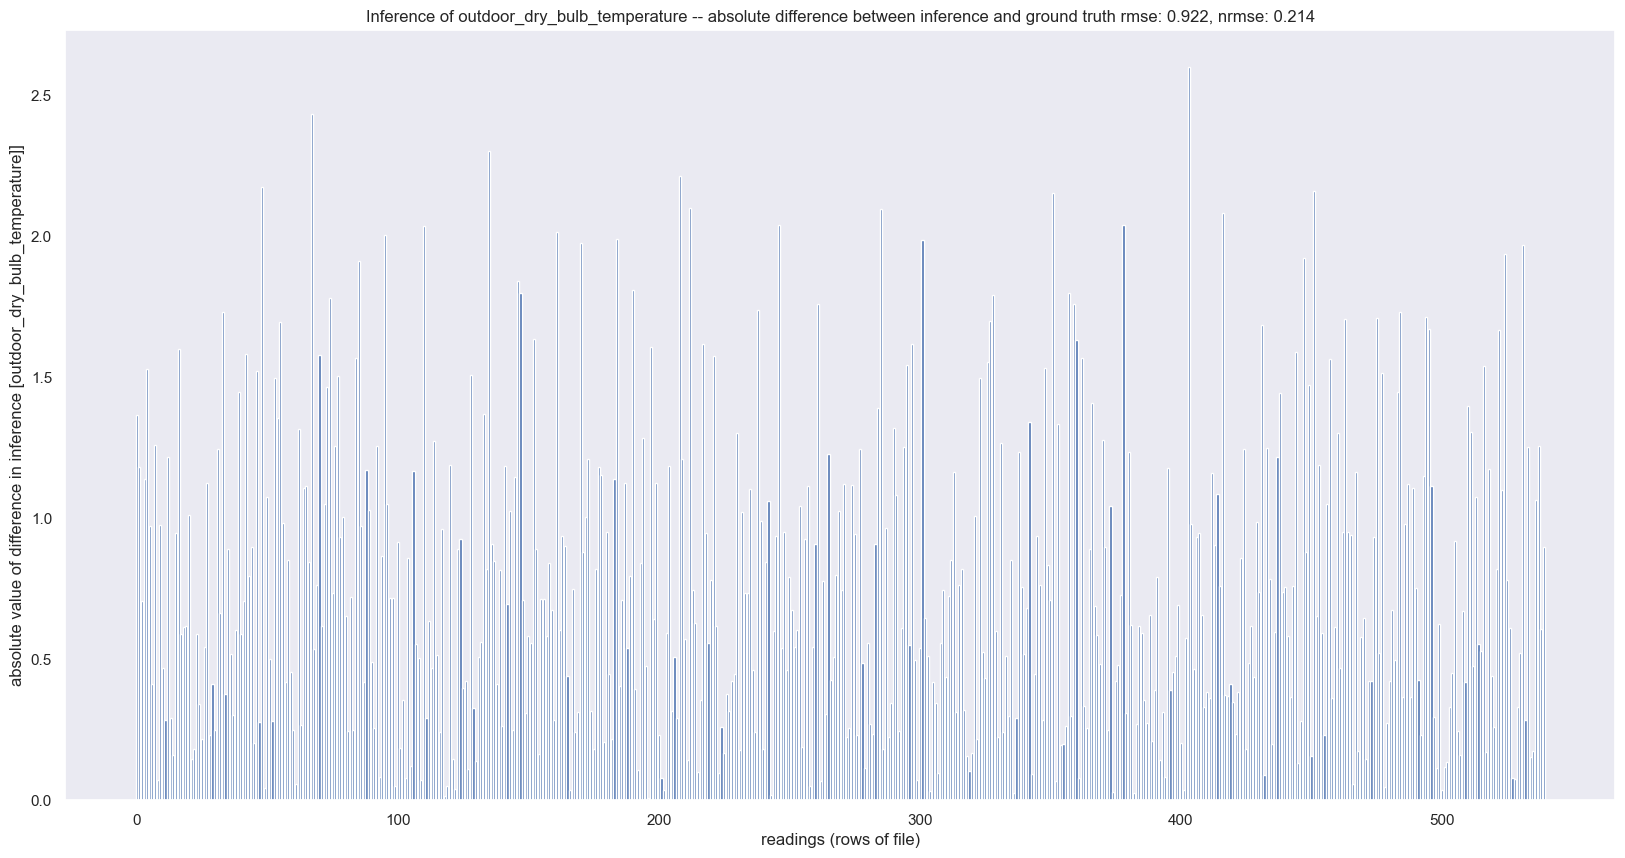

In [32]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)

plt.bar(my_x,my_d)
plt.title(f'Inference of {target} -- absolute difference between inference and ground truth rmse: {rmse:.3f}, nrmse: {nrmse:.3f}')
plt.ylabel(f'absolute value of difference in inference [{target}]]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()